In [1]:
%pylab inline
from numpy import *
from numpy.random import rand, randn, randint
from dPCA import dPCA

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


In [2]:
# number of neurons, time-points and stimuli
N, T, S = 100, 250, 6

# noise-level and number of trials in each condition
noise, n_samples = 0.2, 10

# build two latent factors
zt = arange(T) / float(T)
zs = arange(S) / float(S)

# build trial-by trial data
trialR = noise * randn(n_samples, N, S, T)
trialR += randn(N)[None, :, None, None] * zt[None, None, None, :]
trialR += randn(N)[None, :, None, None] * zs[None, None, :, None]

# trial-average data
R = mean(trialR, 0)

# center data
R -= mean(R.reshape((N, -1)), 1)[:, None, None]

In [23]:
dpca = dPCA.dPCA(labels="st", regularizer="auto", n_components=10)
dpca.protect = ["t"]

You chose to determine the regularization parameter automatically. This can
                    take substantial time and grows linearly with the number of crossvalidation
                    folds. The latter can be set by changing self.n_trials (default = 3). Similarly,
                    use self.protect to set the list of axes that are not supposed to get to get shuffled
                    (e.g. upon splitting the data into test- and training, time-points should always
                    be drawn from the same trial, i.e. self.protect = ['t']). This can significantly
                    speed up the code.


In [24]:
Z = dpca.fit_transform(R, trialR)

Start optimizing regularization.
Starting trial  1 / 3
Starting trial  2 / 3
Starting trial  3 / 3
Optimized regularization, optimal lambda =  0.000449987958058483
Regularization will be fixed; to compute the optimal                    parameter again on the next fit, please                    set opt_regularizer_flag to True.


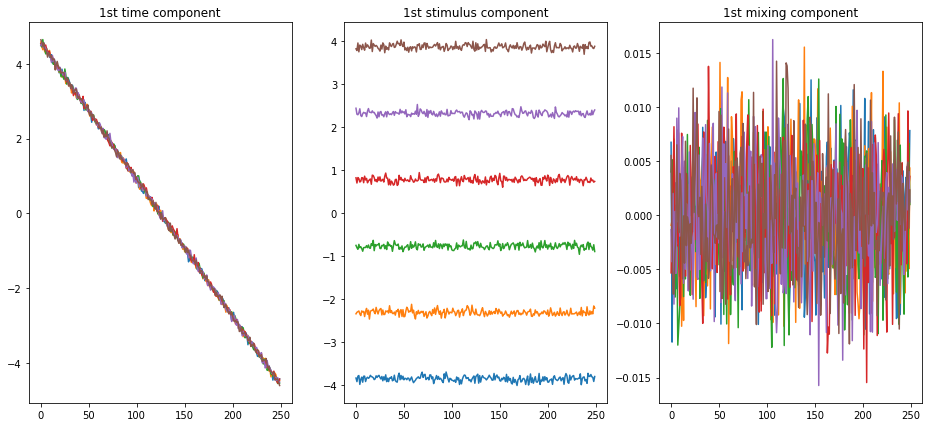

In [25]:
time = arange(T)

figure(figsize=(16, 7))
subplot(131)

for s in range(S):
    plot(time, Z["t"][0, s])

title("1st time component")

subplot(132)

for s in range(S):
    plot(time, Z["s"][0, s])

title("1st stimulus component")

subplot(133)

for s in range(S):
    plot(time, Z["st"][0, s])

title("1st mixing component")
show()

In [21]:
Z["ы"][0, s]

KeyError: 'd'

In [27]:
for key in Z:
    print(key)

s
t
st
